# Salary Estimation

<hr>

#### Importing Modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score, learning_curve

#### Loading the data

In [2]:
df = pd.read_csv("salary-data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


#### Using Pearson Correlation

YearsExperience    0.978242
Salary             1.000000
Name: Salary, dtype: float64


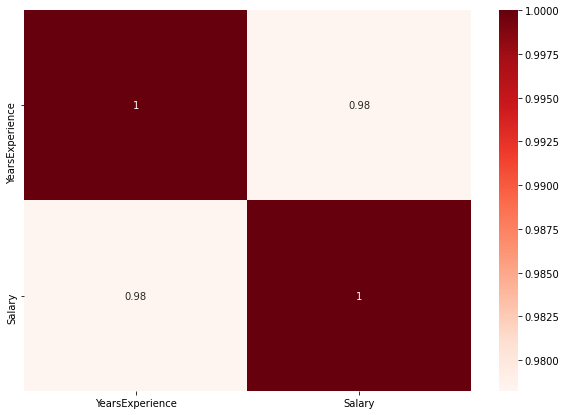

In [4]:
print(df.corr()['Salary'].sort_values())

plt.figure(figsize=(10,7))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

`The "per capita income (US$)" is highly correleated to "year"`

#### Plotting `Years of Experience` and `Salary`

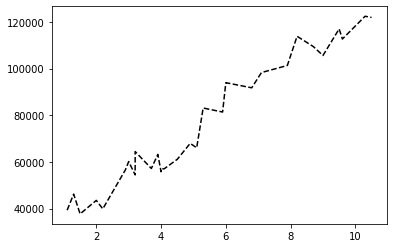

In [5]:
plt.plot(df[['YearsExperience']], df[['Salary']], color='k', linestyle='--')

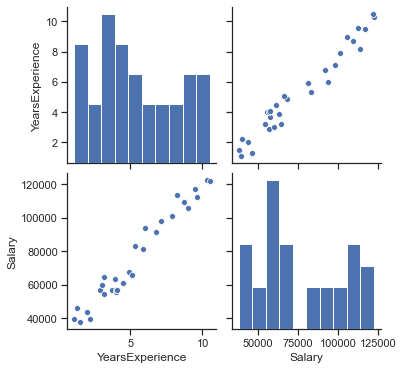

In [6]:
sns.set(style="ticks")
sns.pairplot(df)

#### Splitting the dataset

In [7]:
_feature = 'YearsExperience'
_target = 'Salary'

df = df.sample(frac=1, random_state=1)

train_dataset = df[:20]
X_train = train_dataset[_feature]
y_train = train_dataset[_target]

test_dataset = df[21:30]
X_test = test_dataset[_feature]
y_test = test_dataset[_target]

#### Scaling the data

In [8]:
X_train = scale(X_train).reshape(-1, 1)
y_train = np.asanyarray(y_train).reshape(-1, 1)

X_test = scale(X_test).reshape(-1, 1)
y_test = np.asanyarray(y_test).reshape(-1, 1)

In [9]:
X_train

array([[-0.06826487],
       [ 0.59593386],
       [-0.58486388],
       [ 0.19003464],
       [-0.3634643 ],
       [ 0.48523407],
       [ 1.48153216],
       [-1.28596254],
       [ 1.18633273],
       [ 0.89113329],
       [ 1.00183308],
       [-1.21216268],
       [-1.47046219],
       [ 1.29703252],
       [-0.91696324],
       [ 0.15313471],
       [-0.51106402],
       [-0.84316339],
       [ 1.51843209],
       [-1.54426204]])

#### Creating a model

In [10]:
model = linear_model.LinearRegression()

#### Cross Validation

In [11]:
scoring = 'r2'

score = cross_val_score(model, X_train, y_train, cv=3, scoring=scoring)
score.mean()

0.9199699059047873

#### Learning Curve

In [12]:
_size = np.arange(0.01, 1.01, 0.01)
train_sizes = np.array(_size)
scoring = 'neg_mean_squared_error'

train_sizes_abs, train_scores, cv_scores = learning_curve(model, X_train, y_train, train_sizes=train_sizes, cv=3, scoring=scoring)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:1350: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes' 13 instead of 100).
  warnings.warn("Removed duplicate entries from 'train_sizes'. Number "


In [13]:
train_scores_mean = []
for row in train_scores:
    _mean = row.mean()
    train_scores_mean.append(_mean)
    
cv_scores_mean = []
for row in cv_scores:
    _mean = row.mean()
    cv_scores_mean.append(_mean)    
    
train_scores_mean = -np.array(train_scores_mean)
cv_scores_mean = -np.array(cv_scores_mean)
    
print(train_scores_mean)
print()
print(cv_scores_mean)

[-0.00000000e+00  4.41162993e-23  3.03315787e+06  1.19592698e+07
  2.24308024e+07  2.21780967e+07  2.64736311e+07  2.61559861e+07
  2.39921828e+07  2.61519474e+07  2.52591384e+07  2.60074965e+07
  2.72052965e+07]

[1.35491123e+09 7.38459996e+07 5.42286312e+07 7.05588844e+07
 1.08658607e+08 6.97167785e+07 3.79669615e+07 4.00577668e+07
 3.74806479e+07 3.48096525e+07 3.69732162e+07 4.18772712e+07
 4.38195774e+07]


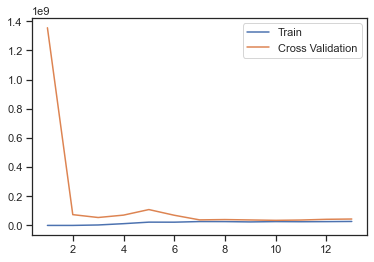

In [14]:
plt.plot(train_sizes_abs, train_scores_mean, label='Train')
plt.plot(train_sizes_abs, cv_scores_mean, label='Cross Validation')

plt.legend()

#### Fitting the model

In [15]:
lr = linear_model.LinearRegression()

model = lr.fit(X_train, y_train)

coefficient = model.coef_
intercept = model.intercept_

print("Coefficient: ", coefficient)
print("Intercept: ", model.intercept_)

Coefficient:  [[26125.97193885]]
Intercept:  [78574.5]


#### Plotting the fitted line

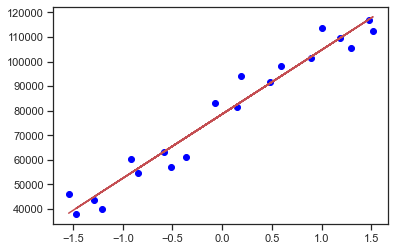

In [16]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, coefficient*X_train + intercept, '-r')

#### Predictions

In [17]:
y_test_pred = model.predict(X_test)
y_test_pred

array([[ 45774.61615998],
       [ 78101.87919539],
       [125742.0563002 ],
       [124040.6214036 ],
       [ 67893.26981579],
       [ 63639.68257429],
       [ 70445.42216069],
       [ 70445.42216069],
       [ 61087.53022939]])

In [18]:
y_test

array([[ 39343.],
       [ 67938.],
       [121872.],
       [122391.],
       [ 57189.],
       [ 64445.],
       [ 56957.],
       [ 55794.],
       [ 56642.]])

#### Evaluating the Model

In [19]:
rms_error = mean_squared_error(y_test, y_test_pred, squared=False)
r2_score_value = r2_score(y_test, y_test_pred)

In [20]:
print(f"Root mean squared error: {rms_error}")
print(f"R2-score: {r2_score_value}")

Root mean squared error: 8781.059695927668
R2-score: 0.9023606512981037


#### Pipeline

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [22]:
scaling = ('scale', StandardScaler())
model = ('model', linear_model.LinearRegression())

# Steps in the pipeline
steps = [scaling, model]

pipe = Pipeline(steps=steps)

# Fiitting the model
model = pipe.fit(X_train, y_train)

# Out-Of-Sample Forecast
y_test_pred = model.predict(X_test)

# Evaluation
rms_error = mean_squared_error(y_test, y_test_pred, squared=False)
r2_score_value = r2_score(y_test, y_test_pred)

print(f"Root mean squared error: {rms_error}")
print(f"R2-score: {r2_score_value}")

Root mean squared error: 8781.059695927668
R2-score: 0.9023606512981037


#### Saving the model

In [23]:
from joblib import dump
dump(model, 'model.joblib')

['model.joblib']

#### Visualizing our prediction against actual values

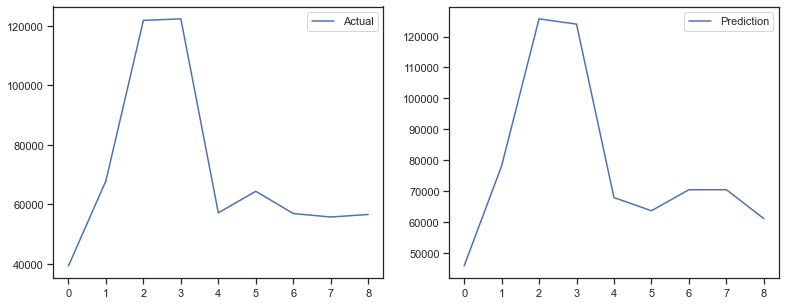

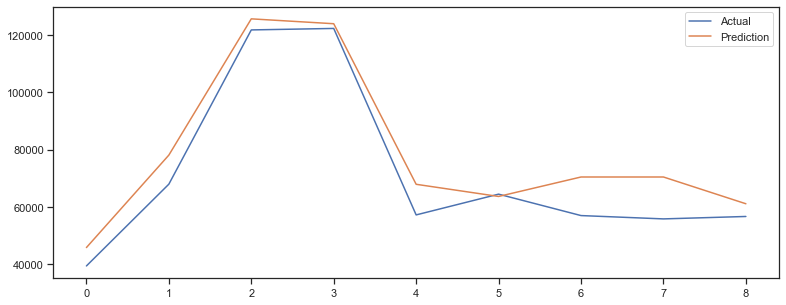

In [24]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

ax1.plot(np.arange(len(y_test)), y_test, label='Actual')
ax2.plot(np.arange(len(y_test_pred)), y_test_pred, label='Prediction')

ax1.legend()
ax2.legend()

f, ax3 = plt.subplots(nrows=1, ncols=1, figsize=(13, 5))

ax3.plot(np.arange(len(y_test)), y_test, label='Actual')
ax3.plot(np.arange(len(y_test_pred)), y_test_pred, label='Prediction')

ax3.legend()

<hr>